In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [132]:
df_raw = pd.read_csv("../data/rbi_money_circulation.csv")

In [133]:
df_raw.head()

,Year,Coins - 0.5,Coins - 1,Coins - 2,Coins - 5,Coins - 10,Notes - 1,Notes - 2,Notes - 5,Notes - 10,Notes - 20,Notes - 50,Notes - 100,Notes - 500,Notes - 1000
0,1977,1.97,0.96,0.0,0.0,0.0,2.72,1.48,5.72,18.25,6.90,9.95,43.02,0.0,0.55
1,1978,2.09,1.10,0.0,0.0,0.0,2.56,1.74,5.76,19.57,7.79,14.40,53.69,0.0,0.00
2,1979,2.25,1.26,0.0,0.0,0.0,2.14,2.15,5.88,21.23,9.61,19.83,59.51,0.0,0.00
3,1980,2.43,1.41,0.0,0.0,0.0,2.07,2.99,6.34,20.97,10.90,22.06,74.06,0.0,0.00
4,1981,2.63,1.54,0.0,0.0,0.0,2.12,3.92,6.92,19.91,12.14,27.24,78.29,0.0,0.00


In [134]:
df_raw.dtypes

Year              int64
Coins - 0.5     float64
Coins - 1       float64
Coins - 2       float64
Coins - 5       float64
Coins - 10      float64
Notes - 1       float64
Notes - 2       float64
Notes - 5       float64
Notes - 10      float64
Notes - 20      float64
Notes - 50      float64
Notes - 100     float64
Notes - 500     float64
Notes - 1000    float64
dtype: object

In [136]:
df = pd.melt(df_raw, id_vars=['Year'], var_name='Currency', value_name='Value')

In [137]:
df.tail()

,Year,Currency,Value
541,2011,Notes - 1000,3468.81
542,2012,Notes - 1000,4299.00
543,2013,Notes - 1000,5081.37
544,2014,Notes - 1000,5612.45
545,2015,Notes - 1000,6325.68


In [138]:
df['Type'] = df.Currency.str.split('-').str[0]
df['Denom'] = df.Currency.str.split('-').str[1]

In [139]:
df.tail()

,Year,Currency,Value,Type,Denom
541,2011,Notes - 1000,3468.81,Notes,1000
542,2012,Notes - 1000,4299.00,Notes,1000
543,2013,Notes - 1000,5081.37,Notes,1000
544,2014,Notes - 1000,5612.45,Notes,1000
545,2015,Notes - 1000,6325.68,Notes,1000


In [140]:
df.dtypes

Year          int64
Currency     object
Value       float64
Type         object
Denom        object
dtype: object

In [141]:
df['Value'] = pd.to_numeric(df['Value'])
df['Denom'] = pd.to_numeric(df['Denom'])
df['Year'] = pd.to_numeric(df['Year'])

In [142]:
df.dtypes

Year          int64
Currency     object
Value       float64
Type         object
Denom       float64
dtype: object

In [164]:
df['Quantity'] = (df['Value']/df['Denom']).round(3)

In [165]:
df.head()

,Year,Currency,Value,Type,Denom,Quantity
0,1977,Coins - 0.5,1.97,Coins,0.5,3.940
429,1977,Notes - 100,43.02,Notes,100.0,0.430
312,1977,Notes - 10,18.25,Notes,10.0,1.825
273,1977,Notes - 5,5.72,Notes,5.0,1.144
234,1977,Notes - 2,1.48,Notes,2.0,0.740


In [166]:
df = df.sort_values(by="Year")

In [167]:
df.to_csv("../data/money.csv", index=False)

In [147]:
dfValue = pd.pivot_table(df, values = "Value", columns = "Currency", index = "Year")

In [148]:
dfValue.head()

Currency,Coins - 0.5,Coins - 1,Coins - 10,Coins - 2,Coins - 5,Notes - 1,Notes - 10,Notes - 100,Notes - 1000,Notes - 2,Notes - 20,Notes - 5,Notes - 50,Notes - 500
Year,,,,,,,,,,,,,,
1977,1.97,0.96,0.0,0.0,0.0,2.72,18.25,43.02,0.55,1.48,6.90,5.72,9.95,0.0
1978,2.09,1.10,0.0,0.0,0.0,2.56,19.57,53.69,0.00,1.74,7.79,5.76,14.40,0.0
1979,2.25,1.26,0.0,0.0,0.0,2.14,21.23,59.51,0.00,2.15,9.61,5.88,19.83,0.0
1980,2.43,1.41,0.0,0.0,0.0,2.07,20.97,74.06,0.00,2.99,10.90,6.34,22.06,0.0
1981,2.63,1.54,0.0,0.0,0.0,2.12,19.91,78.29,0.00,3.92,12.14,6.92,27.24,0.0


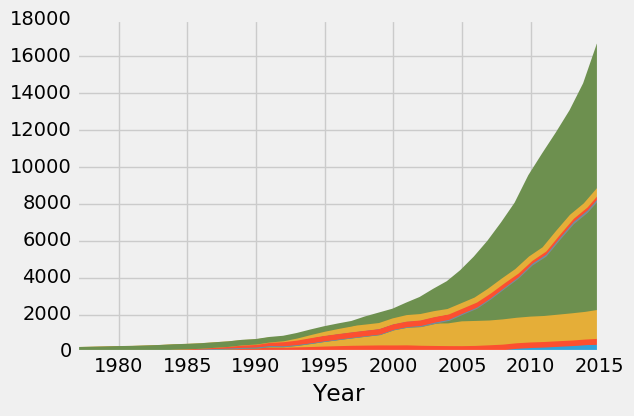

In [149]:
dfValue.plot.area(stacked = True, legend=False)